In [2]:
from BFCalc.BFInterp import DM_spectrum_setup
from BFCalc.createspectragrids import singlechannel_diffflux, getspectrafunc
from utils import log10eaxis, logjacob, makedist
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from matplotlib import cm
from tqdm.autonotebook import tqdm as notebook_tqdm
import os, sys
sys.path.append("BFCalc")


In [29]:
logmassaxis = np.linspace(-0.9,0.5,15)
colormap = cm.get_cmap('cool')

gridtointerpolate   = np.load(f"BFCalc/griddata/channel=b_massenergy_diffflux_grid.npy")
massvalues          = np.array(np.load(f"BFCalc/griddata/massvals_massenergy_diffflux_grid.npy"))
log10xvals        = np.load(f"BFCalc/griddata/log10xvals_massenergy_diffflux_grid.npy")

log10massvals = np.log10(massvalues)-3
gridtointerpolate

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_74263/3463879483.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('cool')


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.79549021e-05, 2.09533162e-05, 1.04230676e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.83211295e-05, 2.84453450e-05, 1.41145707e-05],
       ...,
       [4.10517119e+00, 3.97644319e+00, 3.84543215e+00, ...,
        1.31400894e-07, 8.88485578e-08, 6.16119105e-08],
       [3.49801982e+00, 3.41892126e+00, 3.38142276e+00, ...,
        8.67136554e-08, 5.87862341e-08, 4.01201242e-08],
       [3.39107839e+00, 3.42814497e+00, 3.56227681e+00, ...,
        4.77854570e-08, 3.23265813e-08, 2.14454615e-08]])

In [30]:
DM_spectrum_setup(-1.0, normeaxis=10**log10eaxis)([-1.0,-0.99])

array([-inf, -inf])

In [31]:
spectravals = []
for logmass in notebook_tqdm(logmassaxis):
    tempfunc = DM_spectrum_setup(logmass, normeaxis=10**log10eaxis)
    
    singlerowspecvals = tempfunc(log10eaxis)
    
    spectravals.append(singlerowspecvals)
spectravals = np.array(spectravals)

100%|██████████| 15/15 [00:00<00:00, 776.52it/s]


In [32]:
print(special.logsumexp(spectravals[1,:]+logjacob))

-8.881784197001252e-16


In [33]:
spectravals[3,:]

array([ 4.53218326,  4.39958503,  4.26669589,  4.13624123,  3.98617823,
        3.85827539,  3.7115805 ,  3.56477605,  3.42174826,  3.25479379,
        3.11559361,  2.95383422,  2.79201787,  2.63551357,  2.4498876 ,
        2.29732931,  2.11723295,  1.93720572,  1.76494138,  1.55669673,
        1.39223698,  1.19530179,  0.99833593,  0.81157999,  0.58174764,
        0.40430837,  0.18844398, -0.02762532, -0.23014827, -0.48438044,
       -0.67659979, -0.91477595, -1.15365659, -1.37449834, -1.65835603,
       -1.8614088 , -2.11647776, -2.37024697, -2.59748036, -2.89201608,
       -3.0880409 , -3.33209783, -3.56546115, -3.75978677, -4.00121101,
       -4.15863523, -4.34555791, -4.52584709, -4.68717496, -4.87963193,
       -4.98888989, -5.11156617,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,      

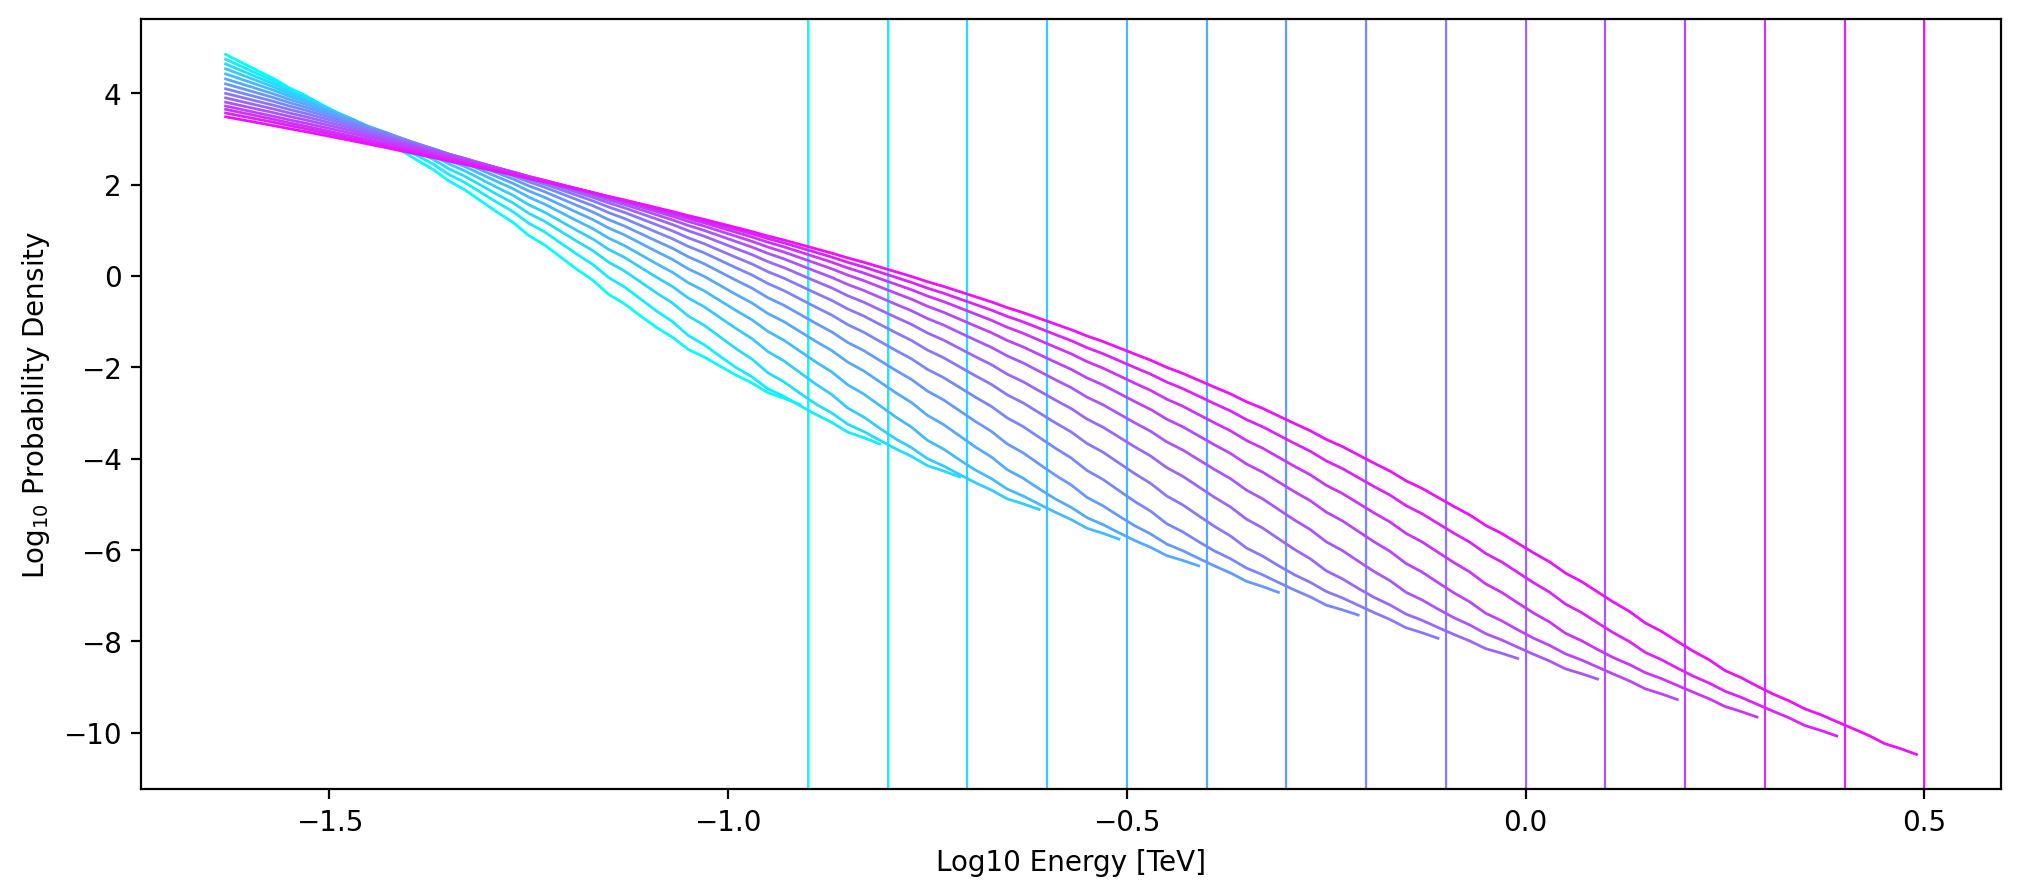

In [34]:
plt.figure(dpi=200, figsize=(12,5))
# plt.pcolormesh(log10eaxis, logmassaxis, spectravals, label=logmass, lw=0.8)
logjacob = np.log(np.log(10))+np.log(log10eaxis[1]-log10eaxis[0])+np.log(10**log10eaxis)
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    
    
    single_spectravals = np.array(spectravals)[idx,:]
    plt.plot(log10eaxis, single_spectravals, color=color, lw=1.0)
    plt.axvline(logmass, c=color, lw=0.8, linestyle='-')

# for logmassval in log10massvals:
#     plt.axvline(logmassval, c='tab:orange', lw=0.5, linestyle="--")
plt.xlabel('Log10 Energy [TeV]')

plt.ylabel(r'Log$_{10} $ Probability Density')
# plt.yscale('log')
# plt.xlim([-0.1*(logmassaxis[-1]-logmassaxis[0])+logmassaxis[0], 0.1*(logmassaxis[-1]-logmassaxis[0])+logmassaxis[-1]])
# plt.ylim([-8,0])

# plt.legend()
plt.show()

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_74263/2473672863.py:15: RuntimeWarning: divide by zero encountered in log
  np.log(gridtointerpolate).T)


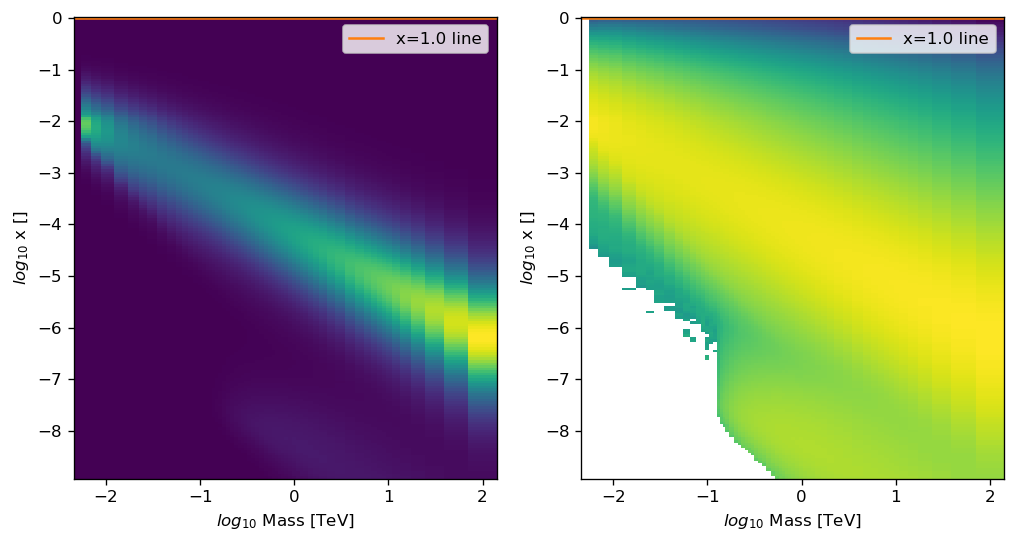

In [35]:
plt.figure(dpi=120,figsize=(10,5))
plt.subplot(1,2,1)
plt.pcolormesh(log10massvals, 
               log10xvals, 
               (gridtointerpolate).T)
plt.axhline(0.0, label="x=1.0 line", c="tab:orange")
plt.xlabel(r"$log_{10}$ Mass [TeV]")
plt.ylabel(r"$log_{10}$ x []")

plt.legend()

plt.subplot(1,2,2)
plt.pcolormesh(log10massvals, 
               log10xvals, 
               np.log(gridtointerpolate).T)
plt.axhline(0.0, label="x=1.0 line", c="tab:orange")
plt.xlabel(r"$log_{10}$ Mass [TeV]")
plt.ylabel(r"$log_{10}$ x []")

plt.legend()


In [10]:
log10massvals.shape

(62,)

In [11]:
gridtointerpolate[log10massvals<-1.,]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.79549021e-05, 2.09533162e-05, 1.04230676e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.83211295e-05, 2.84453450e-05, 1.41145707e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.17994787e-05, 1.30801598e-05, 9.14500095e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.97511400e-05, 1.19141530e-05, 8.37645482e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.85103340e-05, 1.15053739e-05, 8.27572263e-06]])

In [12]:
np.arange(0,5)

array([0, 1, 2, 3, 4])

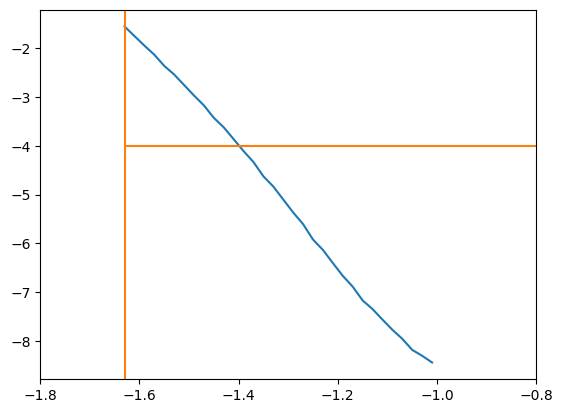

In [13]:
plt.figure()
plt.plot(log10eaxis, DM_spectrum_setup(-1.0)(log10eaxis))
plt.plot(log10eaxis, 0*log10eaxis-4, c="tab:orange")
plt.axvline(log10eaxis[0], c="tab:orange")
plt.xlim(-1.8,-0.8)
plt.show()

In [14]:
special.logsumexp(makedist(logmass=1.5, normeaxis=10**log10eaxis)(log10eaxis)+logjacob)

0.0

In [15]:
special.logsumexp(DM_spectrum_setup(1.5, normeaxis=10**log10eaxis)(log10eaxis)+logjacob)

0.0

In [16]:
log10xvals = np.load(f"BFCalc/griddata/log10xvals_massenergy_diffflux_grid.npy")


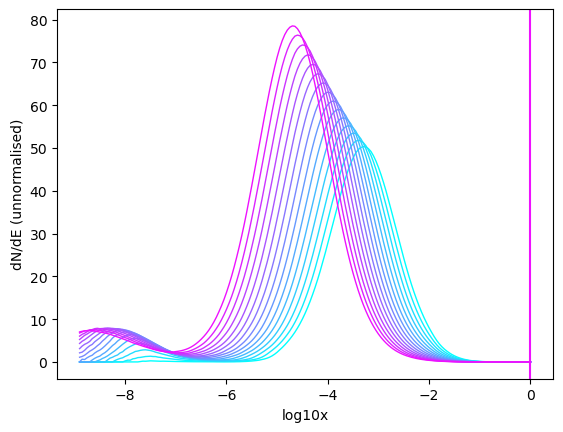

In [52]:
plt.figure()
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])

    plt.plot(log10xvals, getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass)), color=color, lw=1.0)
plt.axvline(0.0, color=color)
plt.xlabel('log10x')
plt.ylabel('dN/dE (unnormalised)')
plt.xlim([min(log10eaxis),0])
plt.show()

0.08502241627571193
0.15999228633391005
0.28060624322236416
0.4622289002156001
0.7169061580401129
1.0517504957063153
1.4754982397699559
1.9888970506942707
2.58637188265718
3.2676519576730865
4.02790747483286
4.86703797591362
5.77971790658251
6.778619450582916
7.866893942854026


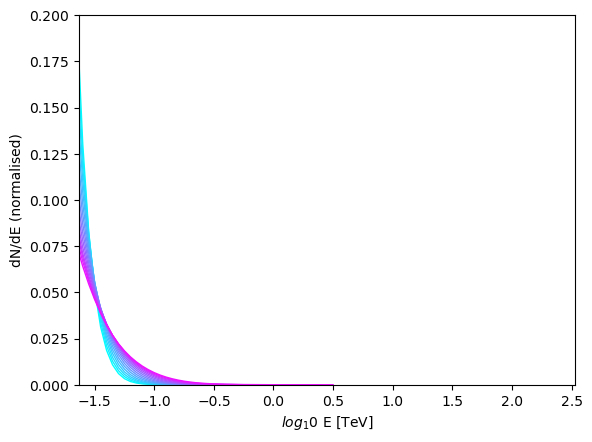

In [53]:
plt.figure()
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    dN_dE_norm = np.nansum(getspectrafunc(10**logmass, 'b')(10**log10eaxis))
    print(dN_dE_norm)
    plt.plot(log10xvals+logmass, getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/dN_dE_norm, color=color, lw=1.0)
plt.xlim([min(log10eaxis), max(log10eaxis)])
plt.xlabel(r'$log_{10}$ E [TeV]')
plt.ylabel(r'dN/dE (normalised)')

plt.ylim(0,0.2)
plt.show()